In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../Data/raw_data1.csv')

In [4]:
data.head()

,Item_id,Location1,Location2,room_size,area,current_floor,total_from,building_type,repair_status,bill_of_sale,price (AZN)
0,4920165,abseron,Masazır q.,2,46.0,2,5,new,Yes,No,52500
1,4905233,abseron,Mehdiabad q.,3,130.0,7,11,new,Yes,Yes,158500
2,4901491,abseron,Masazır q.,2,44.0,1,6,new,Yes,Yes,58500
3,4968966,abseron,Masazır q.,3,92.0,5,8,new,Yes,Yes,123000
4,4868355,abseron,Masazır q.,3,75.0,5,8,new,Yes,Yes,105000


In [41]:
data.describe()

,room_size,area,current_floor,total_from,price (AZN)
count,48364.00000,48364.000000,48364.000000,48364.000000,4.836400e+04
mean,2.78575,102.932642,7.858304,13.529402,2.644968e+05
std,0.90577,56.433562,4.803071,5.371575,1.987422e+05
min,1.00000,10.000000,1.000000,1.000000,8.000000e+03
25%,2.00000,65.000000,4.000000,9.000000,1.520000e+05
50%,3.00000,90.000000,7.000000,16.000000,2.200000e+05
75%,3.00000,126.000000,11.000000,17.000000,3.180000e+05
max,18.00000,1250.000000,27.000000,34.000000,7.000000e+06


### Price Distribution

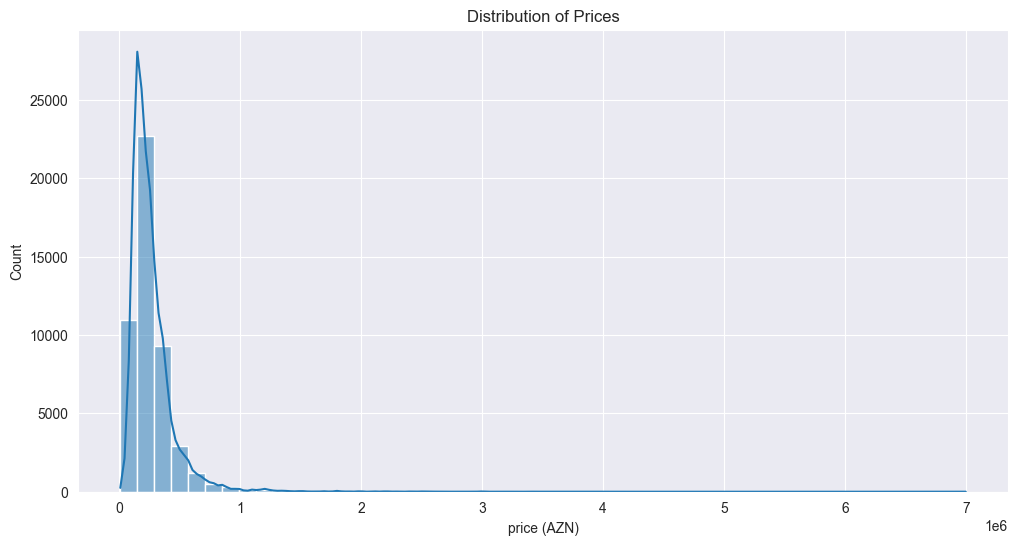

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(data['price (AZN)'], bins=50, kde=True)
plt.title("Distribution of Prices")
plt.show()

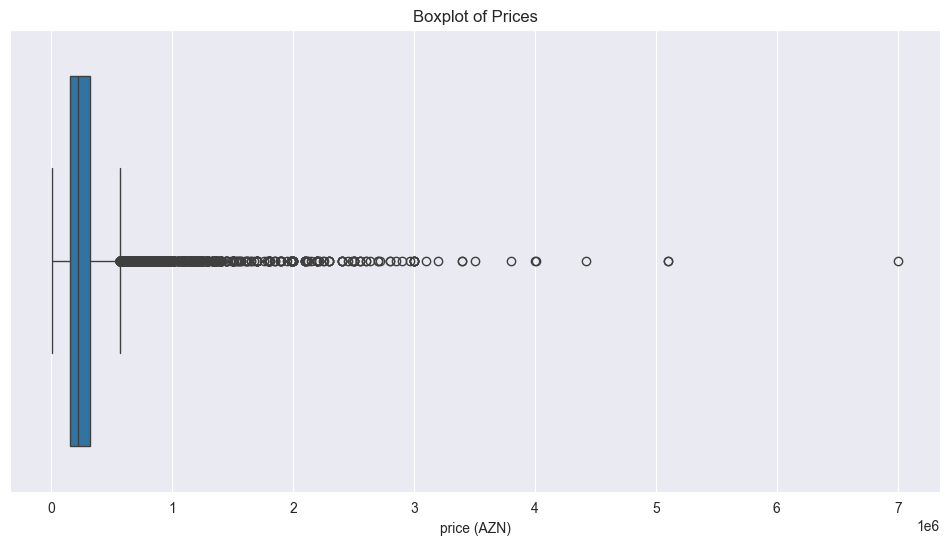

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['price (AZN)'])
plt.title("Boxplot of Prices")
plt.show()

### Price vs. Location

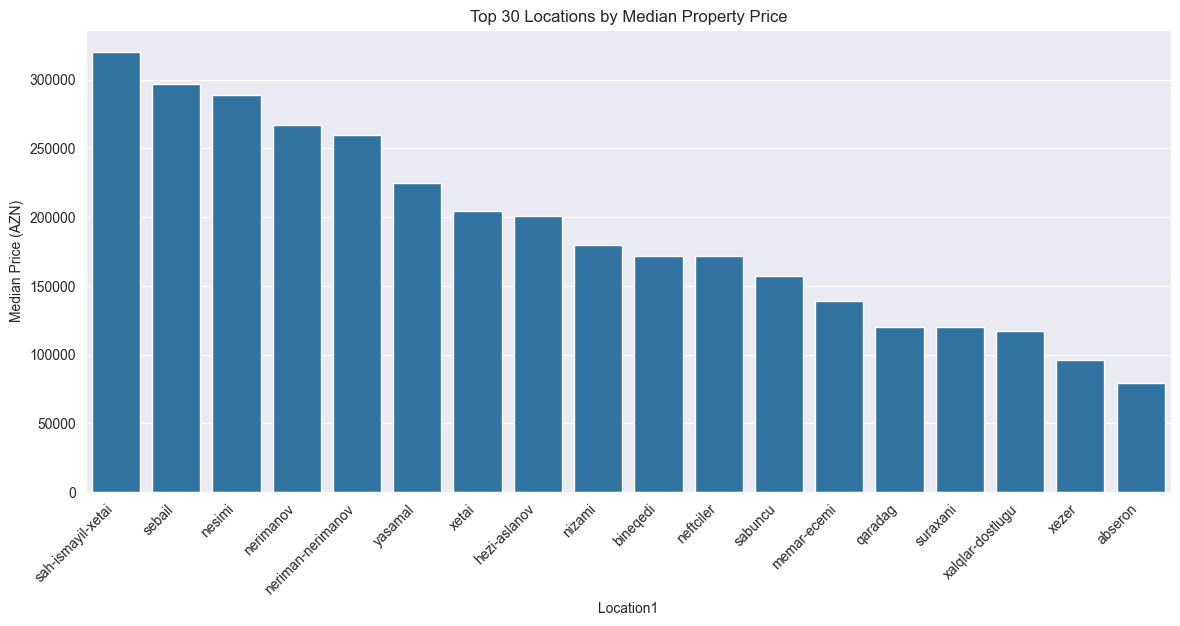

In [9]:
top_30_locations = (data.groupby('Location1')['price (AZN)'].median().sort_values(ascending=False).head(30))
plt.figure(figsize=(14, 6))
sns.barplot(x=top_30_locations.index, y=top_30_locations.values, order=top_30_locations.index)
plt.xticks(rotation=45, ha='right')
plt.title("Top 30 Locations by Median Property Price")
plt.ylabel("Median Price (AZN)")
plt.xlabel("Location1")
plt.show()

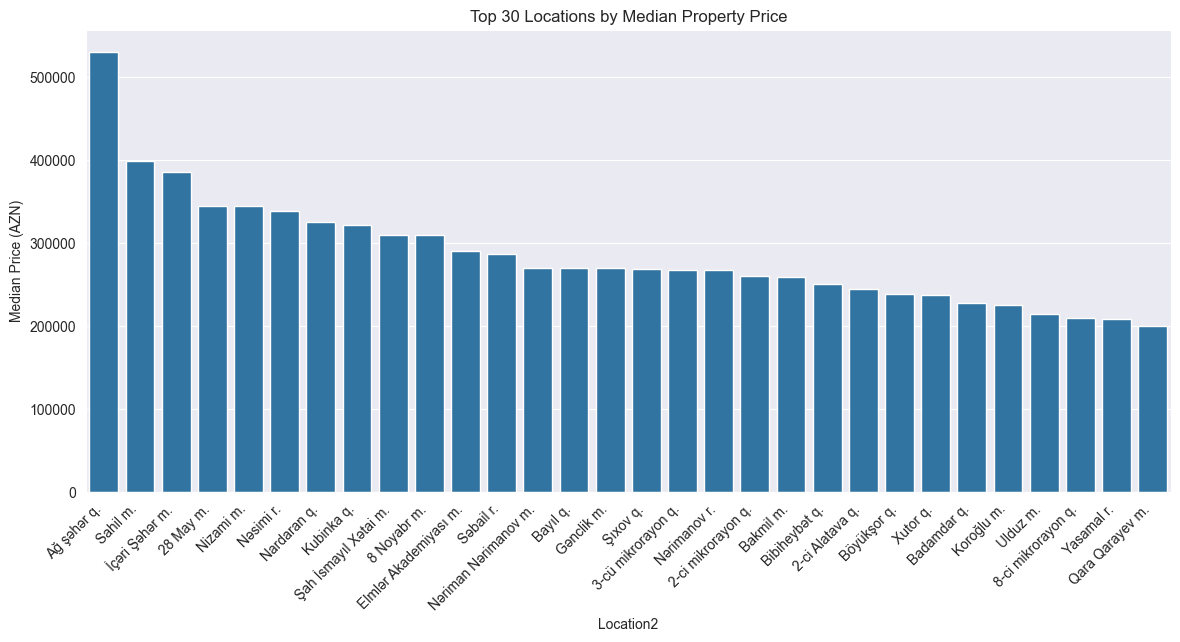

In [10]:
top_30_locations = (data.groupby('Location2')['price '
                                              '(AZN)'].median().sort_values(ascending=False).head(30))
plt.figure(figsize=(14, 6))
sns.barplot(x=top_30_locations.index, y=top_30_locations.values, order=top_30_locations.index)
plt.xticks(rotation=45, ha='right')
plt.title("Top 30 Locations by Median Property Price")
plt.ylabel("Median Price (AZN)")
plt.xlabel("Location2")
plt.show()

### Price vs. Room Size & Area

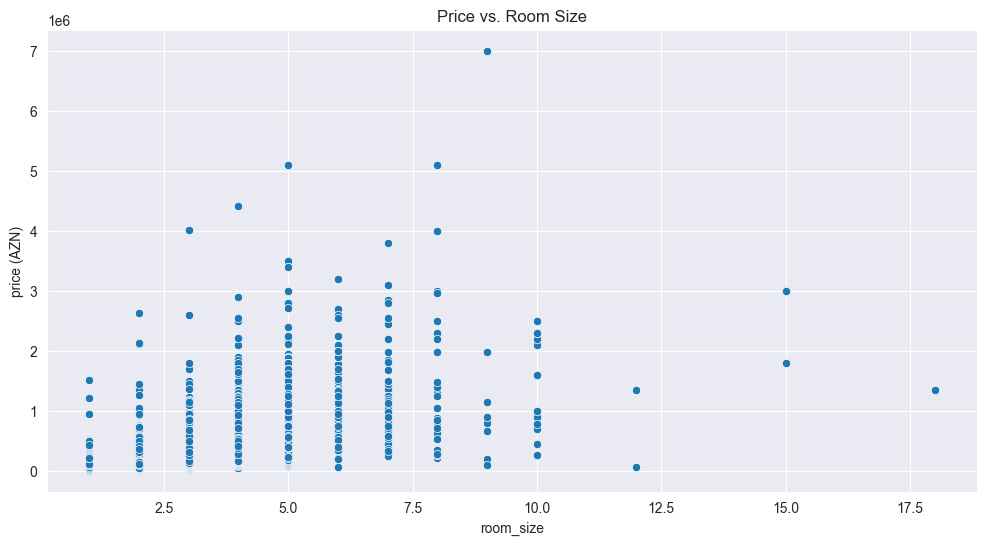

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['room_size'], y=data['price (AZN)'])
plt.title("Price vs. Room Size")
plt.show()


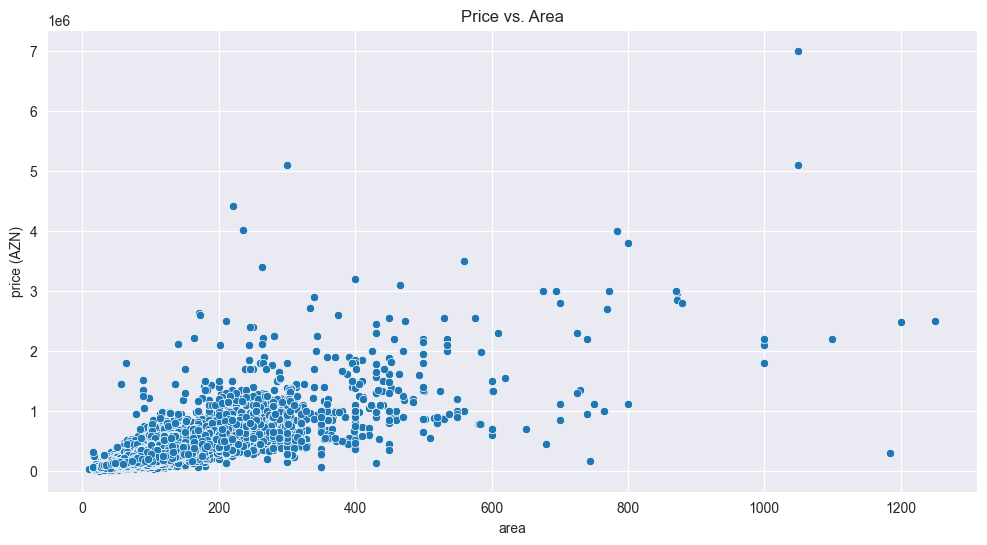

In [13]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['area'], y=data['price (AZN)'])
plt.title("Price vs. Area")
plt.show()

### Price vs. Building Type & Repair Status

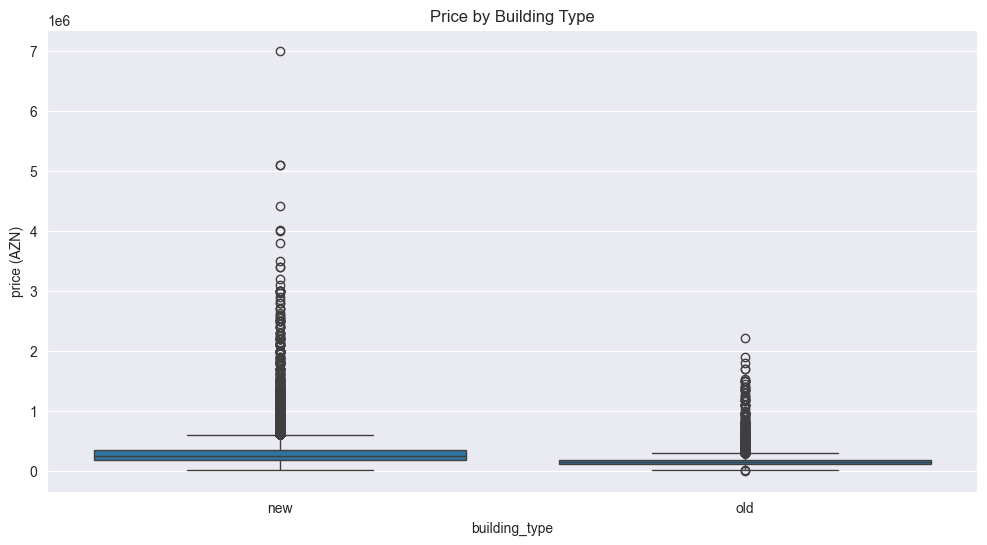

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['building_type'], y=data['price (AZN)'])
plt.title("Price by Building Type")
plt.show()

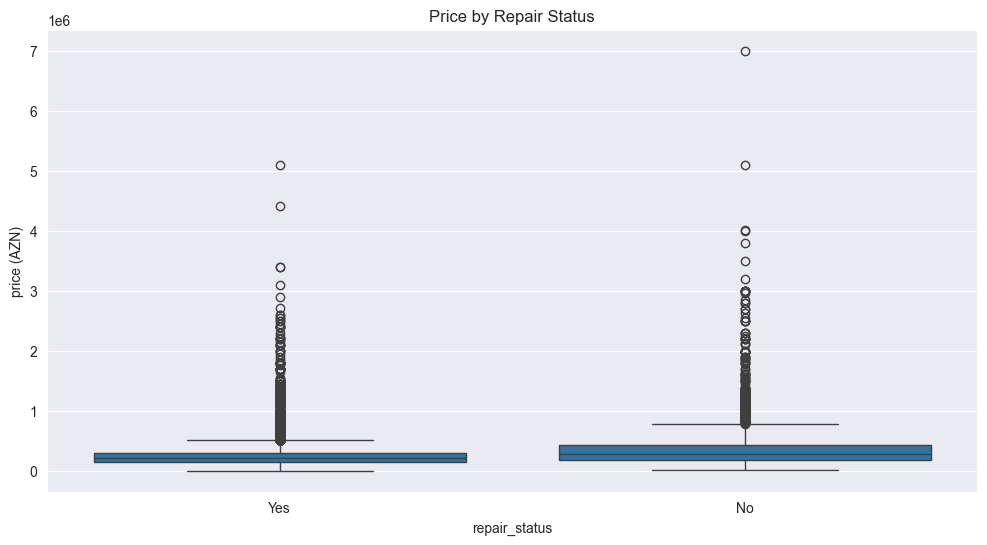

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['repair_status'], y=data['price (AZN)'])
plt.title("Price by Repair Status")
plt.show()

### Floor Level Analysis

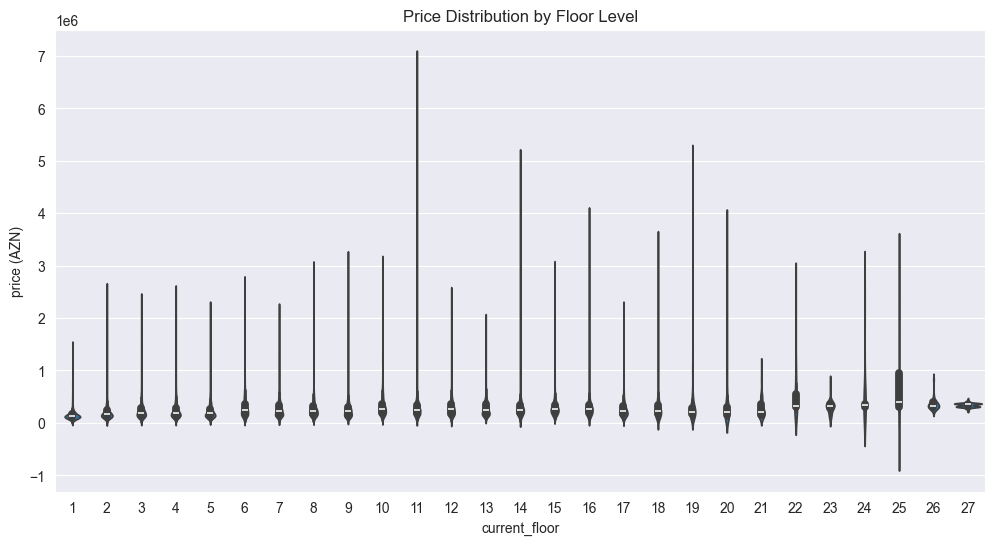

In [17]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=data['current_floor'], y=data['price (AZN)'])
plt.title("Price Distribution by Floor Level")
plt.show()


### Correlation Heatmap

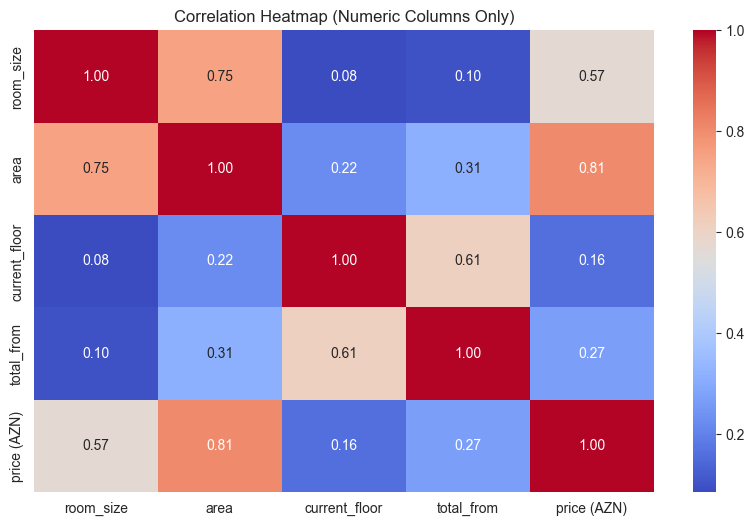

In [23]:
# Select only numeric columns
numeric_data = data.select_dtypes(include="number")

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


### Outlier Detection & Handling

In [26]:
from scipy.stats import zscore

z_scores = np.abs(zscore(numeric_data))
outliers = (z_scores > 3).all(axis=1)  # Z-score threshold of 3
cleaned_data = numeric_data[~outliers]

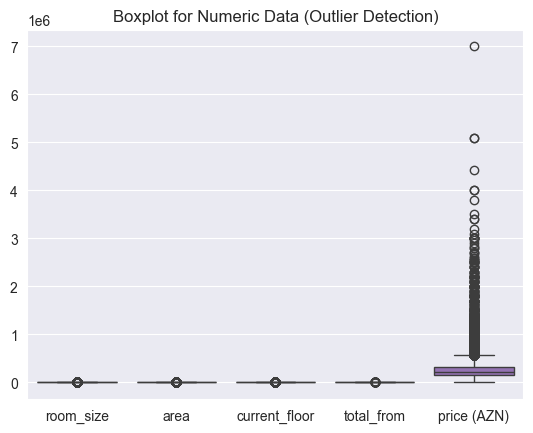

In [36]:
sns.boxplot(data=numeric_data)
plt.title("Boxplot for Numeric Data (Outlier Detection)")
plt.show()

### Handling Categorical Data

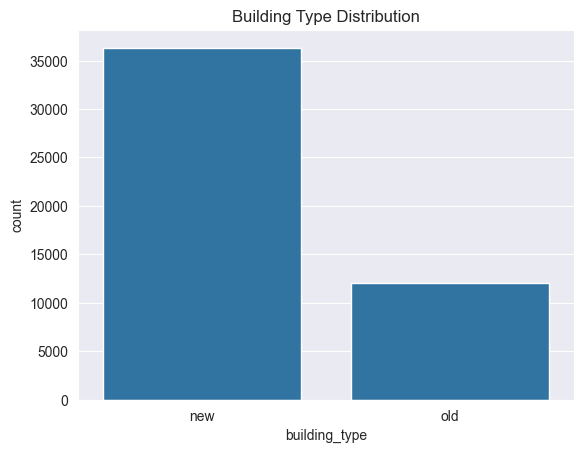

In [37]:
sns.countplot(data=data, x='building_type')
plt.title("Building Type Distribution")
plt.show()

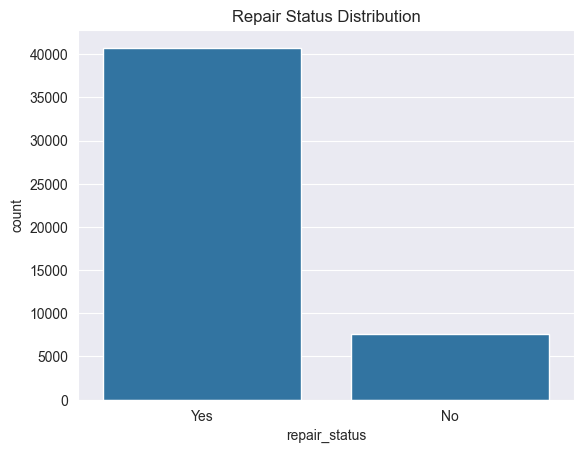

In [39]:
sns.countplot(data=data, x='repair_status')
plt.title("Repair Status Distribution")
plt.show()

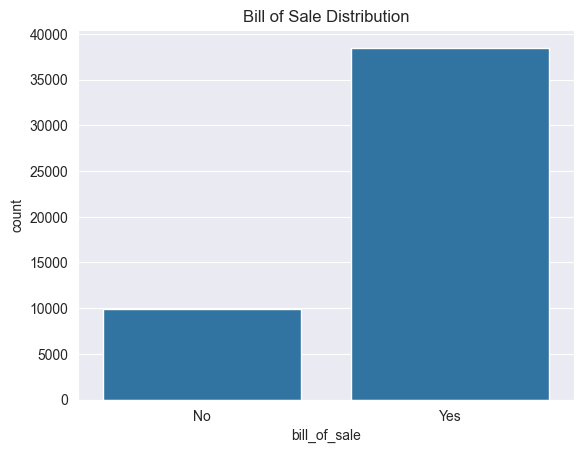

In [40]:
sns.countplot(data=data, x='bill_of_sale')
plt.title("Bill of Sale Distribution")
plt.show()